In [1]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.preprocessing import PolynomialFeatures  # 
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
# %pylab

#### 构建数据
    np.linspace(0, 6, N)： 产生0-6之间均匀的随机数
    np.random.randn(N)： 产生正态分布的随机数，N维度

In [3]:
np.random.seed(0)
N = 9
x = np.linspace(0, 6, N) + np.random.randn(N)
x = np.sort(x)
y = x**2 - 4*x - 3 + np.random.randn(N)

In [4]:
x.shape = -1,1
y.shape = -1,1

#### 构建模型
    PolynomialFeatures()：如果输入样本是二维的并且形式为[a，b]，则2次多项式特征是[1，a，b，a ^ 2，ab，b ^ 2]。
    

In [5]:
model_1 = Pipeline([
    ("poly", PolynomialFeatures()),
    ("linear", LinearRegression(fit_intercept=False))  # 截距设置为False，即不计算截距
])
model_2 = Pipeline([
    ("poly", PolynomialFeatures()),
    ("linear", RidgeCV(alphas=np.logspace(-3, 2, 100), fit_intercept=False))   # 截距设置为False，即不计算截距
])

models = model_1, model_2

In [6]:
mpl.rcParams["font.sans-serif"] = ["simHei"]
mpl.rcParams["axes.unicode_minus"] = False
plt.rcParams['figure.figsize'] = (10.0, 10.0)   # 单位是inches
np.set_printoptions(suppress=True)  # 取消科学计数法

In [7]:
plt.figure(figsize=(10, 15), facecolor="w")
d_pool = np.arange(1, N, 1)  # 阶
m = d_pool.size
clrs = []  # 颜色
for c in np.linspace(16711680, 255, m):
    clrs.append("#%06x" % int(c))
line_width = np.linspace(5, 2, m)
titles = ("线性回归", "Ridge回归")
# clrs # 颜色
# d_pool # array([1, 2, 3, 4, 5, 6, 7, 8])

<Figure size 720x1080 with 0 Axes>

1阶,系数为： [[-12.12113792   3.05477422]]
0.8956280680570019 

2阶,系数为： [[-3.23812184 -3.36390661  0.90493645]]
0.9903632619966876 

3阶,系数为： [[-3.90207326 -2.61163034  0.66422328  0.02290431]]
0.9905109438201274 

4阶,系数为： [[-8.20599769  4.20778207 -2.85304163  0.73902338 -0.05008557]]
0.9910535041768006 

5阶,系数为： [[ 21.59733285 -54.12232017  38.43116219 -12.68651476   1.98134176
   -0.11572371]]
0.9973866029961168 

6阶,系数为： [[ 14.73304785 -37.87317494  23.67462342  -6.07037979   0.42536833
    0.06803132  -0.00859246]]
0.997398833575737 

7阶,系数为： [[ 314.30344622 -827.89446924  857.33293186 -465.46543638  144.21883851
   -25.67294678    2.44658612   -0.09675941]]
0.9996238159215853 

8阶,系数为： [[-1189.50149198  3643.69109456 -4647.92941149  3217.22814712
  -1325.87384337   334.32869072   -50.57119119     4.21251817
     -0.148521  ]]
0.9999999999999996 

1阶，alpha=0.104762，系数为： [[-11.25490373   2.85998183]]
0.8913782980010647 

2阶，alpha=0.148497，系数为： [[-2.89059872 -3.50263675  0.91813534]]
0.99

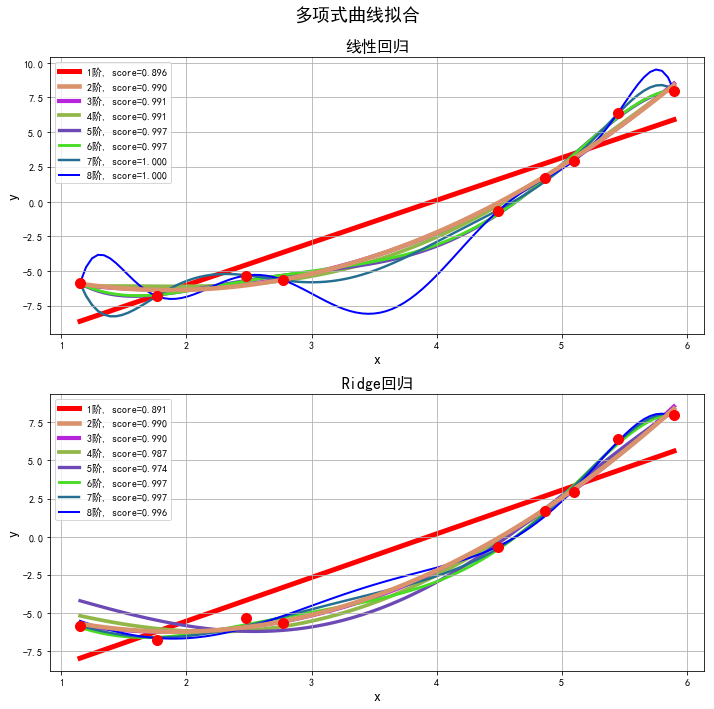

In [8]:
for t in range(2):
    model = models[t]
#     %matplotlib linline
    plt.subplot(2, 1, t+1)
    plt.plot(x, y, "ro", ms=10, zorder=N)
    for i, d in enumerate(d_pool):
        # 多项式特征的程度
        model.set_params(poly__degree=d)  # 设置PolynomialFeatures()参数
        model.fit(x, y)
        lin = model.get_params("参数为bool值，默认为True")["linear"]  # 从估计器获取参数
        if t==0:
            print("%d阶,系数为：" % d, lin.coef_)  # coef_为 w系数
        else:
            print("%d阶，alpha=%.6f，系数为：" % (d, lin.alpha_), lin.coef_)
        x_hat = np.linspace(x.min(), x.max(), num=100)
        x_hat.shape = -1, 1
#         print(x_hat)
        y_hat = model.predict(x_hat)
        s = model.score(x, y)
        print(s, "\n")
        zorder = N-1 if (d==2) else 0
        plt.plot(x_hat, y_hat, color=clrs[i], lw=line_width[i], 
                 label=("%d阶, score=%.3f" % (d,s)), zorder=zorder)
    plt.legend()
    plt.grid()
    plt.title(titles[t], fontsize=16)
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y", fontsize=14)
    plt.tight_layout(1, rect=(0, 0, 1, 0.95))
    plt.suptitle("多项式曲线拟合", fontsize=18)

    